In [1]:
# Numerical solution of the linear advection equation
# u_t + u_x = 0
# using *left sided difference* for u_x -> UPWIND
# and *right sided difference* for u_x -> Downwind
# periodic boundary data

In [2]:
from numpy import *
import matplotlib.pyplot as plt

In [3]:
# Initial condition
def u0(x):
    return where(abs(x)<=1, 1.0, 0.0)

In [4]:
# Spatial domain [-L, L] and time [0, T]   
L = 5.
T = 1.
# Discretization parameters h, dt
h = 0.1
dt = 0.025
# Grid ratio 
gam = dt/h
# number of space and time steps
n = int(2*L/h)+1
m = int(T/dt)

In [5]:
# Initialize
x = linspace(-L,L,n)
u = u0(x)

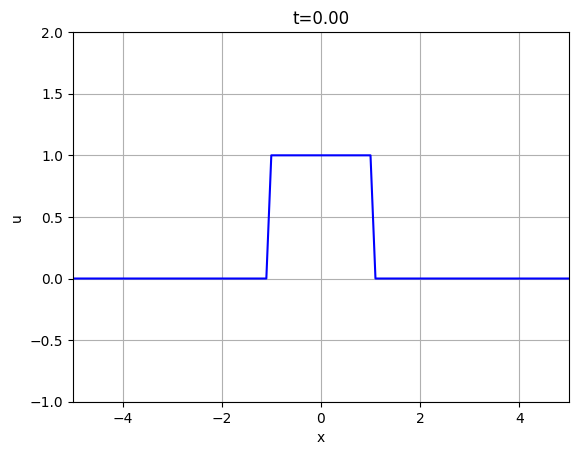

In [6]:
# Plot initial data
fig,ax= plt.subplots()
ax.set(xlim=(-L,L), ylim=(-1,2), xlabel='x', ylabel='u', title='t=0.00')
ax.plot(x, u0(x), 'b-')
ax.grid()
plt.show()

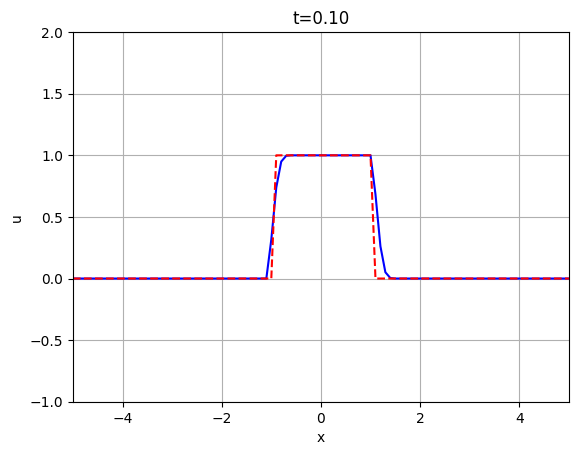

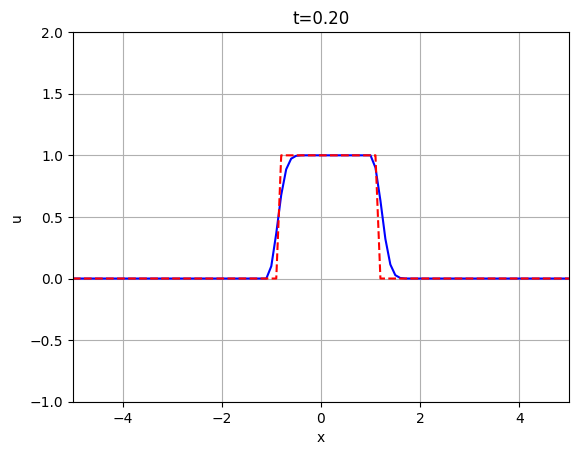

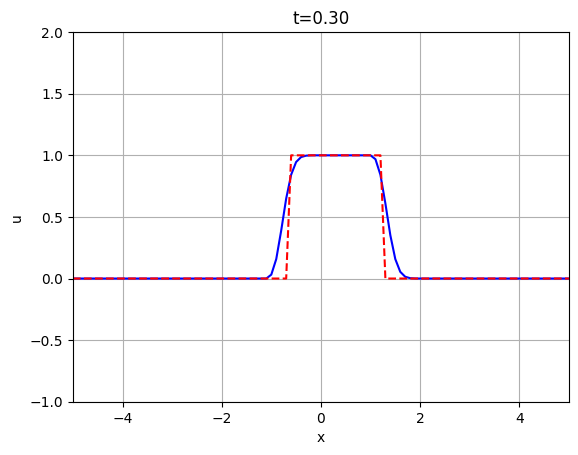

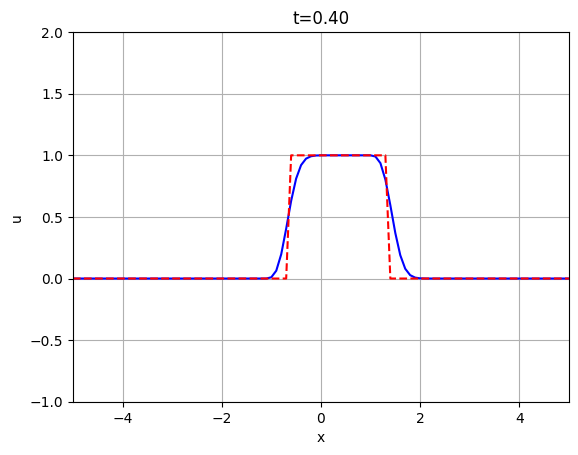

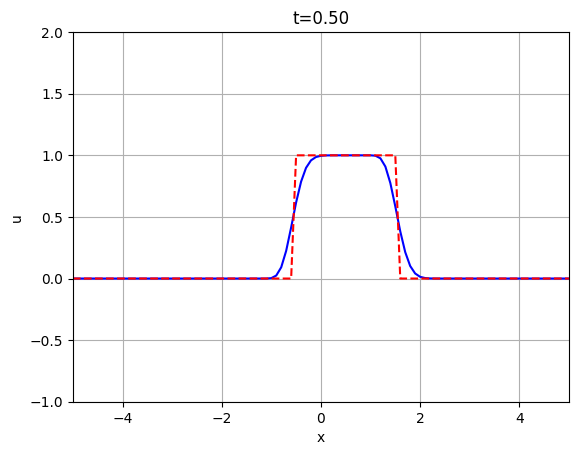

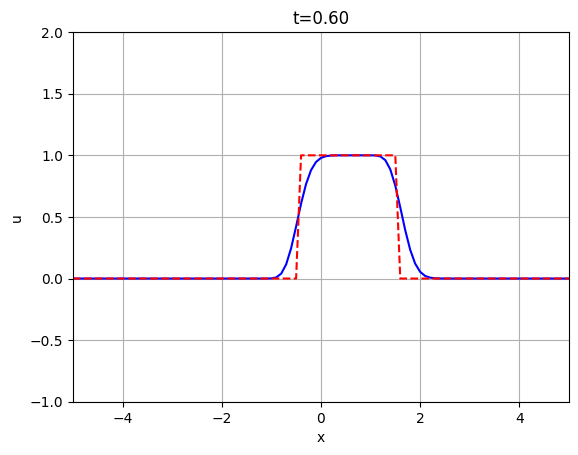

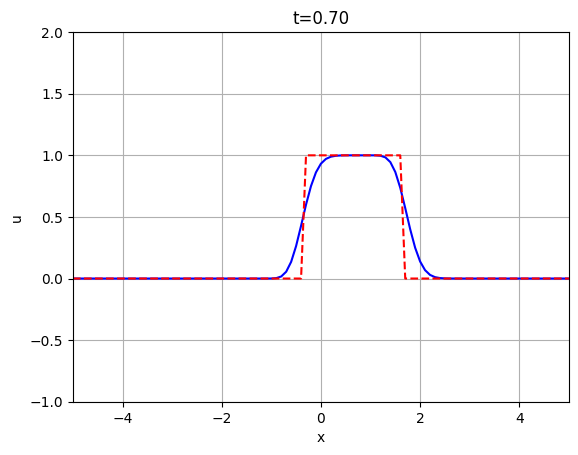

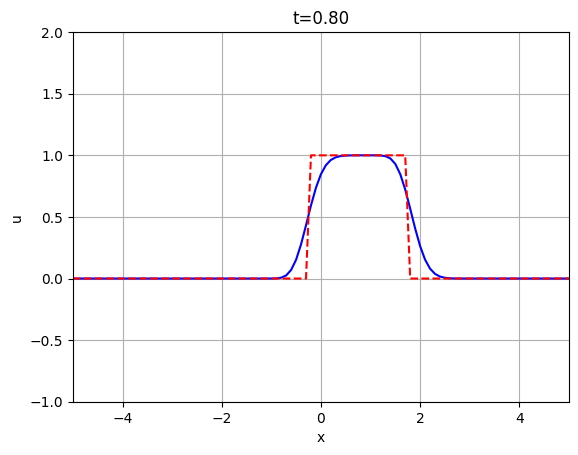

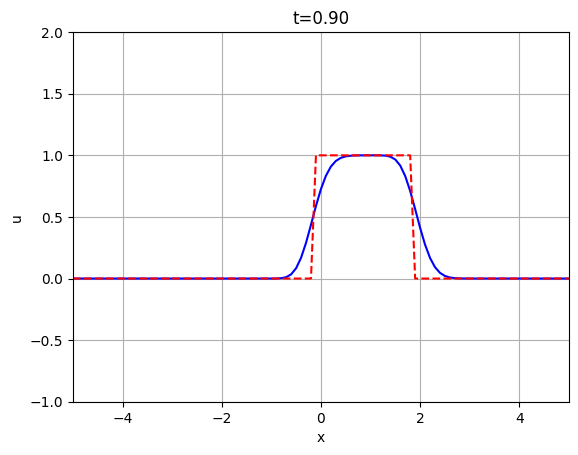

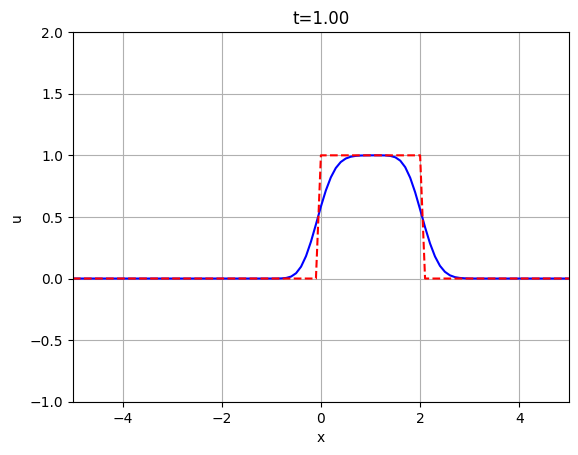

In [7]:
# Time loop
un = zeros_like(u)
for t in linspace(dt,T,m):
    # Compute solution at new time level
    un[1:-1] = u[1:-1]-gam*(u[1:-1]-u[0:-2])
    # boundary data - periodic boundary conditions
    un[0] = u[0]-gam*(u[0]-u[-1])
    un[-1] = u[-1]-gam*(u[-1]-u[-2])
    u=un.copy()
    # and plot it, if t is multiple of 0.1
    if isclose(10*t,round(10*t)):
        fig,ax= plt.subplots()
        ax.set(xlim=(-L,L), ylim=(-1,2), xlabel='x', ylabel='u',
              title='t=%4.2f' %t)
        ax.plot(x, u, 'b-')
        ax.plot(x, u0(x-t), 'r--')
        ax.grid()
        plt.show()

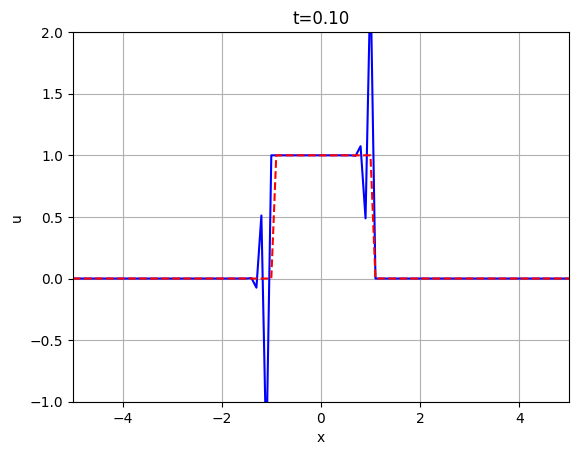

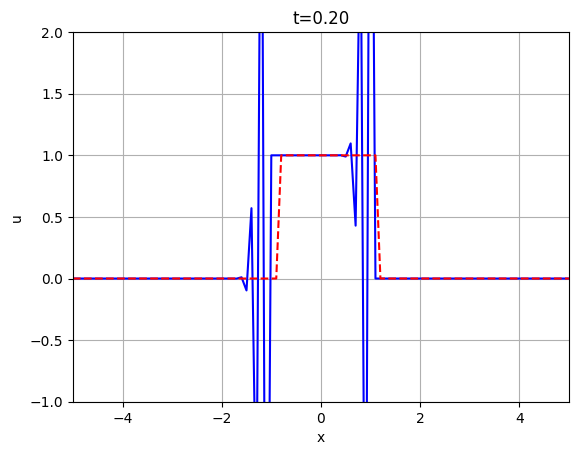

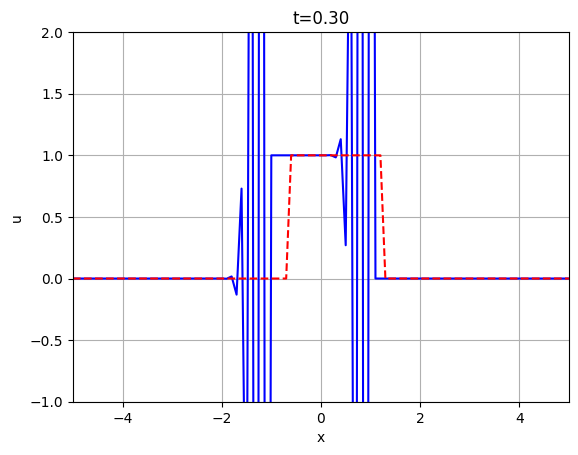

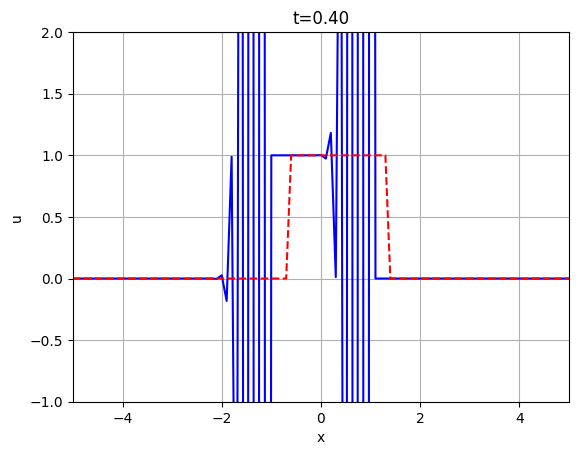

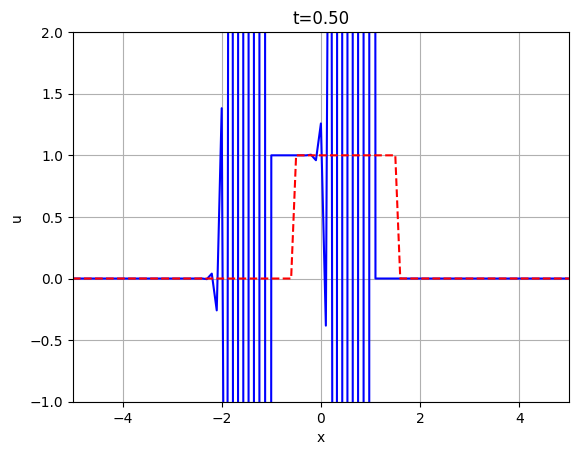

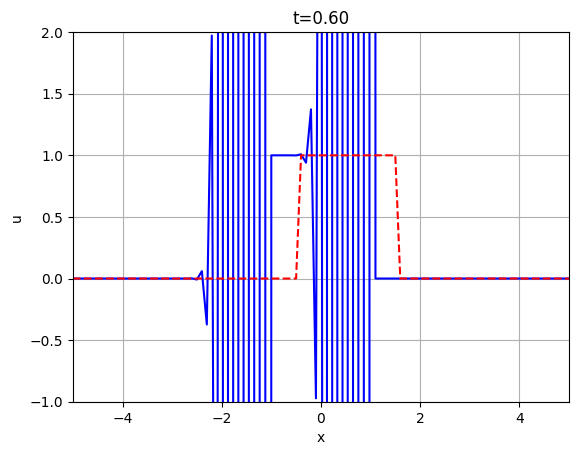

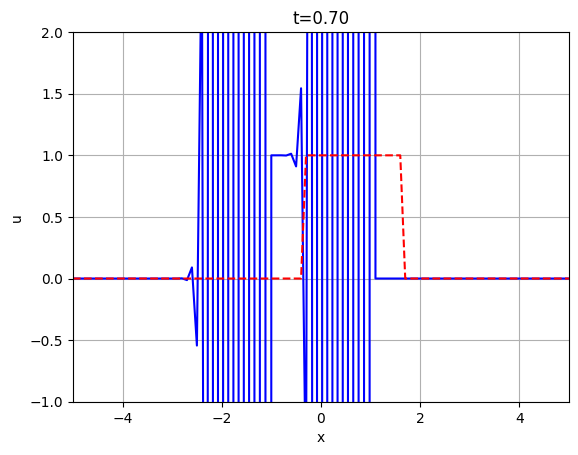

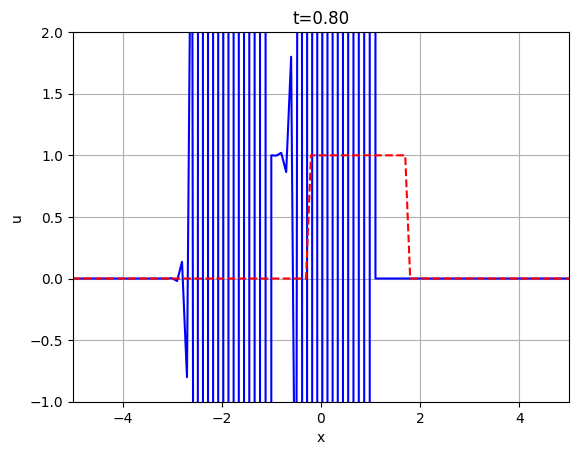

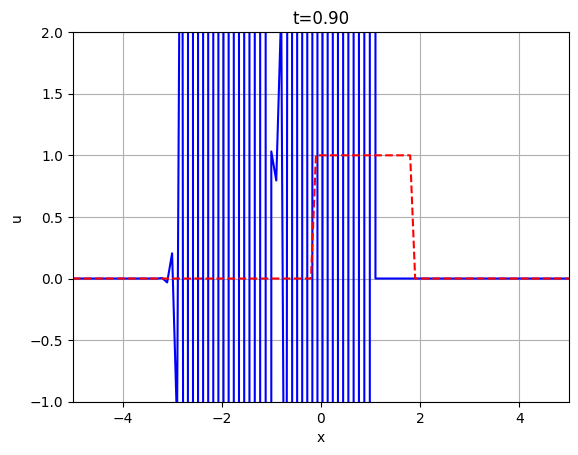

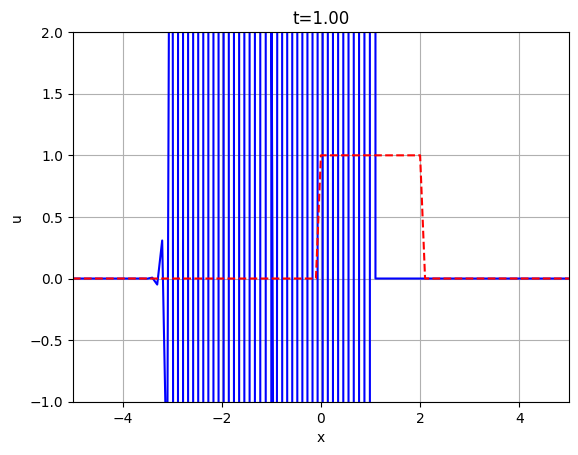

In [8]:
# Replace left sided difference by *right sided*
# du/dx (t,x)  = (u_{i+1}^k - u_i^k) / h
# Downwind scheme

# Initialize
x = linspace(-L,L,n)
u = u0(x)

# Time loop
for t in linspace(dt,T,m):
    # Compute solution at new time level
    u[1:-1] = u[1:-1]-gam*(u[2:]-u[1:-1])
    # boundary data
    u[0] = u[0]-gam*(u[1]-u[0])
    u[-1] = u[-1]-gam*(u[0]-u[-1])
    
    # and plot it, if t is multiple of 0.1
    if isclose(10*t,round(10*t)):
        fig,ax= plt.subplots()
        ax.set(xlim=(-L,L), ylim=(-1,2), xlabel='x', ylabel='u',
              title='t=%4.2f' %t)
        ax.plot(x, u, 'b-')
        ax.plot(x, u0(x-t), 'r--')
        ax.grid()
        plt.show()

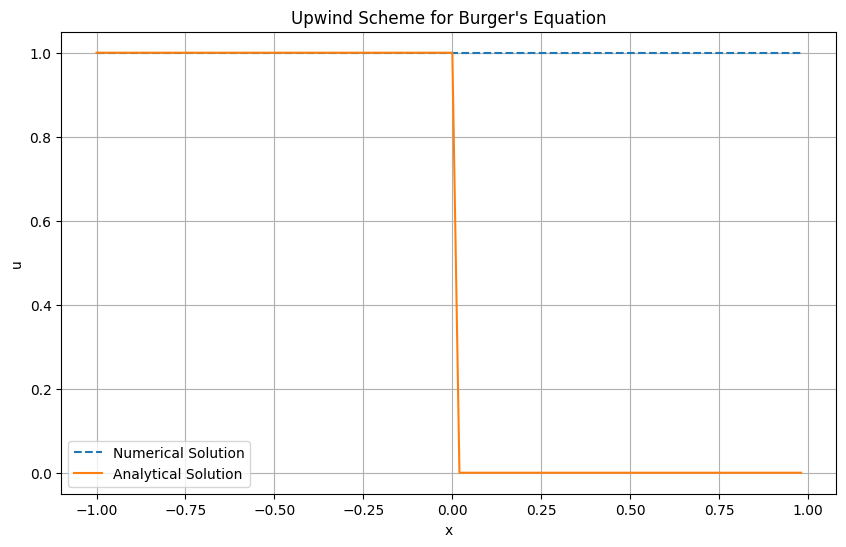

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 2.0         # Domain length
T = 1.0         # Total time
N = 100         # Number of spatial points
dx = L / N      # Spatial step size
dt = 0.01       # Time step size
gamma = dt / dx # Courant number

# Initial condition
x = np.linspace(-L/2, L/2, N, endpoint=False)
U = np.where((x >= -1) & (x <= 1), 1, 0)

# Upwind scheme
def f(u):
    return 0.5 * u**2

def upwind(U, gamma, N):
    U_new = np.copy(U)
    for i in range(N):
        U_new[i] = U[i] - gamma * (f(U[i]) - f(U[i-1]))
    return U_new

# Time integration
t = 0
while t < T:
    U = upwind(U, gamma, N)
    t += dt

# Analytical solution (shock wave propagation)
def analytical_solution(x, t):
    U_analytical = np.where((x >= -1 - t) & (x <= 1 - t), 1, 0)
    return U_analytical

# Plotting the results
U_analytical = analytical_solution(x, T)

plt.figure(figsize=(10, 6))
plt.plot(x, U, label='Numerical Solution', linestyle='--')
plt.plot(x, U_analytical, label='Analytical Solution', linestyle='-')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.title('Upwind Scheme for Burger\'s Equation')
plt.grid()
plt.show()
